In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Ej 1
Hacer un programa que reciba una matriz cuadrada A nxn y un entero
positivo k, y que aplique k iteraciones del metodo de la potencia con un
vector aleatorio inicial v. El programa debe devolver un vector a, donde
a_i sea la aproximacion al autovalor obtenida en el paso i.

In [3]:
#creo una funcion para normalizar vectores
def normalizar(v):
    return v / np.linalg.norm(v)

In [4]:
#creo la funcion para estimar el ava maximo
def estimarAva(A, k):
    """
    El metodo de la potencia consiste en expresar a un vector cualquiera en una
    base de autovectores de la matriz A.
    Luego, multiplicamos dicho vector por la matriz, lo normalizamos para que
    no se haga demasiado grande, y lo volvemos a multiplicar por A, normalizando
    el resultado y continuando asi la iteracion.
    Lo que va a suceder es que la multiplicacion va a ir tendiendo al autovector
    asociado al ava de mayor valor.
    Nos quedamos con la norma de ese vector para obtener el autovalor de mayor modulo,
    ya que tenia norma 1 antes de pasar por la matriz, por lo que fue escalado en un factor ava_mod_max
    """
    #el vector random con el que comienzo es
    x_monio = np.random.rand(A.shape[0],1)

    #voy mejorando la solucion
    estimaciones_ava = []
    for i in range(0, k):
        x_monio = A @ x_monio
        ava_monio = np.linalg.norm(x_monio)
        estimaciones_ava.append(ava_monio)
        x_monio = normalizar(x_monio)
    
    return estimaciones_ava

Ej 2
a) Tomar una matriz A 100x100 de coordenadas aleatorias y utilizar el programa
para realizar 100 iteraciones del metodo
b) Graficar las aproximaciones obtenidas en funcion del numero de iteraciones
¿Considera que el metodo converge rapidamente?

In [5]:
#a)
#creo matriz de 100x100 random
A = np.random.rand(100,100)
#los avas son
avas = np.linalg.eigvals(A)
#el ava de mayor modulo es
ava_mod_max = np.linalg.norm(avas, np.inf)
print("Ava modulo maximo: ", ava_mod_max)

#corro 100 iteraciones del metodo de la potencia para estimar este ava
k = 100
ava_mod_max_estimaciones = estimarAva(A, k)
print(ava_mod_max_estimaciones)

Ava modulo maximo:  49.93829675181762
[240.17455174426624, 49.910097262280686, 49.93877305878209, 49.938273128247914, 49.93829728162583, 49.938296723436714, 49.938296755224314, 49.938296752147615, 49.93829675181702, 49.93829675181888, 49.93829675181752, 49.93829675181756, 49.93829675181758, 49.93829675181756, 49.938296751817575, 49.938296751817575, 49.93829675181756, 49.93829675181757, 49.93829675181758, 49.93829675181757, 49.93829675181756, 49.938296751817575, 49.938296751817575, 49.93829675181756, 49.93829675181757, 49.93829675181758, 49.93829675181756, 49.93829675181757, 49.93829675181758, 49.93829675181756, 49.93829675181757, 49.938296751817575, 49.938296751817575, 49.93829675181757, 49.93829675181757, 49.93829675181757, 49.938296751817575, 49.93829675181757, 49.93829675181757, 49.93829675181757, 49.938296751817575, 49.938296751817575, 49.93829675181756, 49.93829675181757, 49.93829675181758, 49.93829675181756, 49.93829675181757, 49.938296751817575, 49.93829675181757, 49.93829675181

Vemos que efectivamente nuestras aproximaciones se van acercando cada vez más al valor obtenido por numpy.

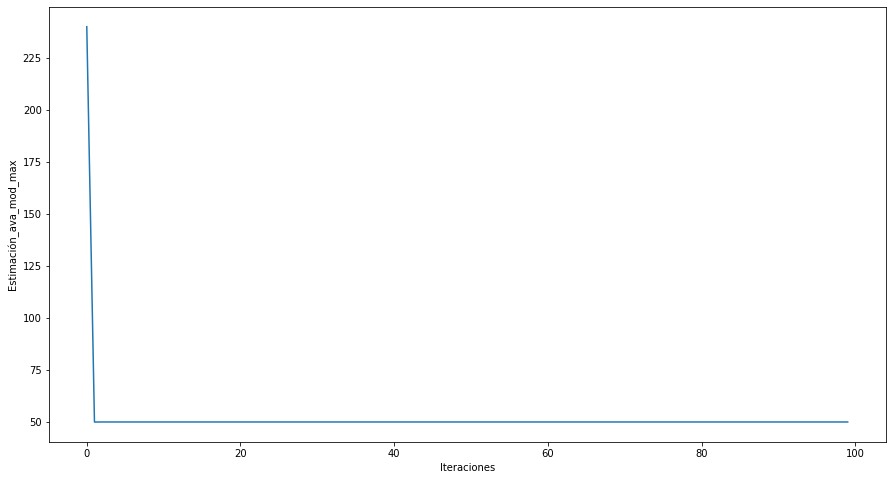

In [27]:
#b)
#creo la figura donde plotear
fig, ax = plt.subplots(figsize=(15, 8))
#ploteo las iteraciones vs las estimaciones
ax.set_xlabel("Iteraciones")
ax.set_ylabel("Estimación_ava_mod_max")
ax.plot(range(k), ava_mod_max_estimaciones)

El método converge de forma muy rápida, ya que a partir de las primeras iteraciones ya tenemos practicamente el autovalor buscado.

Ej 3
(a) Tomar una matriz C 100x100 de coordenadas aleatorias y considerar la matriz
simetrica A = 1/2 (C + C_T) (Tiene todos sus autovalores reales pues es simetrica)
Definir B = A + 500I y aplicar 100 pasos del metodo de la potencia a B
(b) Llamamos lambda_max al autovalor de mayor modulo de B y definimos el vector
de error e 1x100
e_i = |lambda_max - a_i|
Graficar los errores en funcion del numero de iteracion ¿Que funcion es?
(c) Grafiar log(e_i) y volver a pensar el item (b)
Sabiendo que el factor por el que se multiplica el error es aproximadamente
(lambda_2/lambda_1)∧2, la pendiente de la recta obtenida deria ser aproximadamente
2 log(lambda_2/lambda_1).
Para comparar los valores obtenidos experimentalmente, en el mismo grafico
representar la funcion y(x) = 2 Log(lamnda_2 / lambda_1) x + log(e_0).
Recomendaciones: Se puede usar la funcion sorted() para ordenar los coeficientes
de un vector. En este caso que trabajamos con una matriz simetrica tambien
puede ser util la funcion np.linal.eigh().

In [7]:
#a)
#creo matriz de 100x100 random
C = np.random.rand(100,100)
A = 1/2 * (C + C.T) # A es matriz simetrica
B = A + 500 * np.eye(100)

#aplico 100 pasos del metodo de la potencia
k = 100
ava_mod_max_esimaciones_B = estimarAva(B, k)

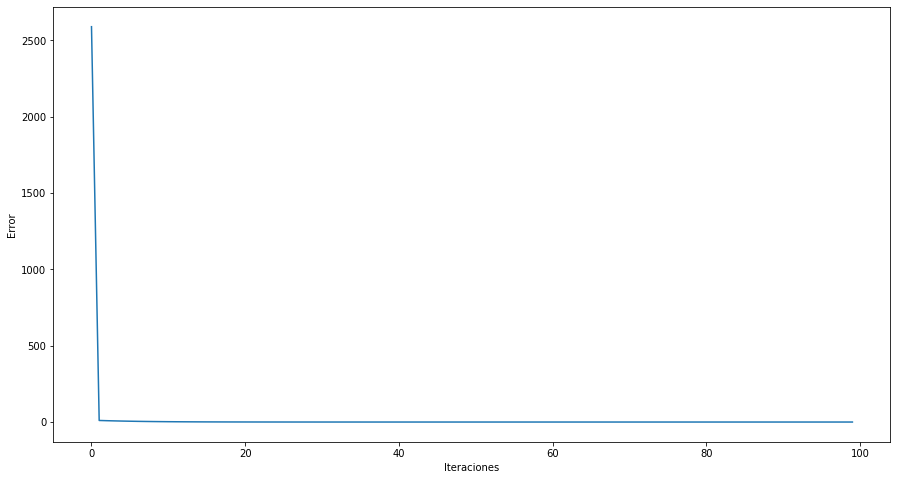

In [25]:
#b)
#para calcular los errores en la estimacion, calculo el ava de modulo maximo con python
avas_B = np.linalg.eigvals(B)
ava_mod_max_B = np.linalg.norm(avas_B, np.inf)

#con las estimaciones calculadas previamente y el ava de modulo maximo, calculo los errores
errores = [abs(ava_mod_max_B - ava_mod_max_estimado) for ava_mod_max_estimado in ava_mod_max_esimaciones_B]

#grafico los errores en funcion de las iteraciones
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("Iteraciones")
ax.set_ylabel("Error")
ax.plot(range(k), errores)

Como los numeros estan muy cerca entre sí, no se puede discernir si hay alguna
función que relacione los datos. Conviene usar escala logarítmica
para ver si hay alguna relacion entre los mismos que no podemos ver en la
escala lineal.

Text(0, 0.5, 'Error_log_10')

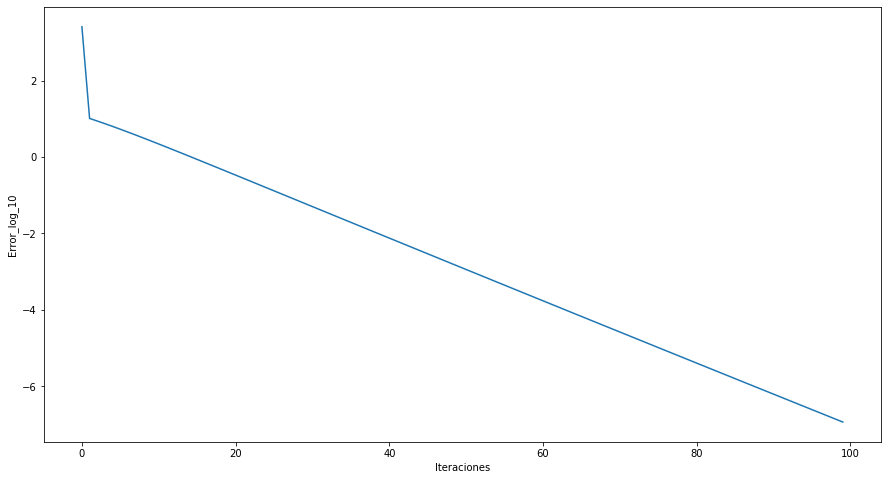

In [24]:
#c)
#Calculo el log base 10 para todos los errores, y los ploteo en una escala lineal, lo que es equivalente
#a plotear los valores de errores obtenidos previamente en una escala logaritmica
errores_log_10 = [math.log(error, 10) for error in errores]
#ploteo
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(range(k), errores_log_10)
ax.set_xlabel("Iteraciones")
ax.set_ylabel("Error_log_10")

Vemos que hay una relación lineal entre las variables, que viene dada por una recta de pendiente (lambda_2/lambda_1)**2

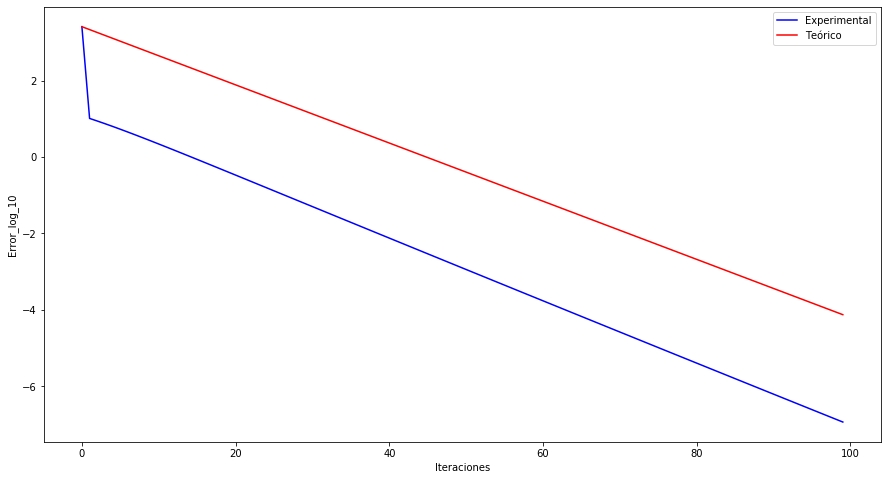

In [22]:
#comparamos los valores experimentales con la siguiente funcion
def y(x, e0, ava_mod_max, ava_mod_ante_max):
    return (2 * math.log(ava_mod_ante_max/ava_mod_max, 10) * x) + math.log(e0, 10)

#calculo el segundo autovalor de mayor modulo
ava_mod_ante_max_B = sorted(abs(avas_B))[-2]
#me quedo con el primer error
e0 = errores[0]
#evaluo a la funcion en las k iteraciones dadas
x_ = np.array(range(k))
y_ = y(x_, e0, ava_mod_max_B, ava_mod_ante_max_B)
#ploteo los errores en log base 10 (grafico anterior)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(range(k), errores_log_10, c="blue", label="Experimental")
#ploteo la nueva funcion
ax.plot(x_, y_, c="red", label="Teórico")
ax.legend(loc="best")
ax.set_xlabel("Iteraciones")
ax.set_ylabel("Error_log_10")
plt.show()

Vemos que la pendiente es la misma, y las rectas son muy similares.

Ej 4
Repetir el experimento utilizando B = A + K I, para K = 1000, 2000 y 5000.
¿Por que la velocidad de convergencia disminuye?

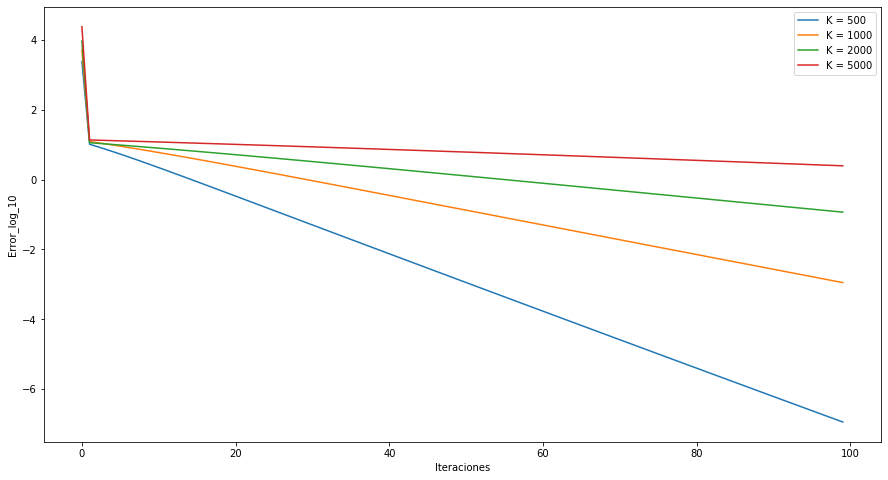

In [28]:
#creo una funcion que repita el procedimiento hecho en el inciso 3)a) varias veces
#para ello modifico adecuadamente a la matriz A creada en dicho inciso
def repetir_experimento(K, A):
    #creo la matriz B con el K deseado
    B = A + K * np.eye(100)
    
    #calculo autovalores
    avas = np.linalg.eigvals(B)
    #me quedo con el de mayor modulo
    ava_mod_max = np.linalg.norm(avas, np.inf)
    #y el de segundo mayor modulo
    ava_mod_ante_max = sorted(abs(avas))[-2]
    #calculo la velocidad de convergencia
    v = (ava_mod_ante_max/ava_mod_max)**2
    
    #aplico 100 pasos del metodo de la potencia
    k = 100
    res = estimarAva(B, k)
    #calculo los errores
    errores = [abs(ava_mod_max - ava_mod_max_estimado) for ava_mod_max_estimado in res]
    #calculo el log base 10 de los errores
    errores_log_10 = [math.log(error, 10) for error in errores]
    
    #devuelvo la velocidad de convergencia y los errores del K caso
    return (v, errores_log_10)

#casos a analizar
Ks = [500, 1000, 2000, 5000]
#creo un vector para almacenar las velocidades de convergencia para cada K caso
vKs = []
#creo un vector para almacenar los errores log 10
errs_K = []

for K in Ks:
    expK = repetir_experimento(K, A)
    #guardo la velocidad de convergencia en la lista vKs
    vKs.append(expK[0])
    #guardo los errores en la lista errs_K
    errs_K.append(expK[1])

#ploteo en el mismo grafico todos los erores
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(Ks)):
    ax.plot(range(k), errs_K[i], label=f"K = {Ks[i]}")

ax.set_xlabel("Iteraciones")
ax.set_ylabel("Error_log_10")
ax.legend(loc="best")

Vemos que la pendiente de la convergencia de los errores aumenta a medida que aumentamos el K. Esto se debe a que la velocidad de convergencia aumenta, como podemos ver en el grafico siguiente:

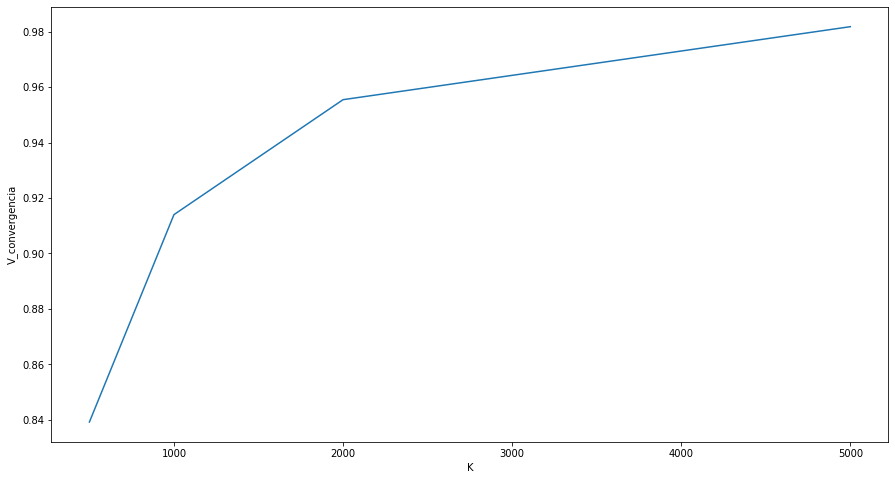

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("K")
ax.set_ylabel("V_convergencia")
ax.plot(Ks, vKs)

In [ ]:
Concluimos que la velocidad de convergencia no disminuye a medida que aumentamos el K, sino que aumenta. 
Esto se debe a que  el cociente entre el segundo autovalor de modulo maximo y el primero va aumentando a medida 
que aumentamos el K.